In [1]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
from datetime import datetime,date

from glob import glob

import seaborn as sns
from matplotlib import pyplot as plt
from datetime import datetime,date,timedelta
%matplotlib inline

In [40]:
#_EPL_ALL_ = pd.read_csv(r'C:\Data Analysis\Sujay_DataAnalysis\Final\Data\EPL_2005-2006.csv')

C:\Data Analysis\Sujay_DataAnalysis\Final\Data\EPL_2000-2001.csv
C:\Data Analysis\Sujay_DataAnalysis\Final\Data\EPL_2001-2002.csv
C:\Data Analysis\Sujay_DataAnalysis\Final\Data\EPL_2002-2003.csv
C:\Data Analysis\Sujay_DataAnalysis\Final\Data\EPL_2003-2004.csv


b'Skipping line 305: expected 57 fields, saw 72\nSkipping line 306: expected 57 fields, saw 72\nSkipping line 307: expected 57 fields, saw 72\nSkipping line 308: expected 57 fields, saw 72\nSkipping line 309: expected 57 fields, saw 72\nSkipping line 310: expected 57 fields, saw 72\nSkipping line 311: expected 57 fields, saw 72\nSkipping line 312: expected 57 fields, saw 72\nSkipping line 313: expected 57 fields, saw 72\nSkipping line 314: expected 57 fields, saw 72\nSkipping line 315: expected 57 fields, saw 72\nSkipping line 316: expected 57 fields, saw 72\nSkipping line 317: expected 57 fields, saw 72\nSkipping line 318: expected 57 fields, saw 72\nSkipping line 319: expected 57 fields, saw 72\nSkipping line 320: expected 57 fields, saw 72\nSkipping line 321: expected 57 fields, saw 72\nSkipping line 322: expected 57 fields, saw 72\nSkipping line 323: expected 57 fields, saw 72\nSkipping line 324: expected 57 fields, saw 72\nSkipping line 325: expected 57 fields, saw 72\nSkipping li

C:\Data Analysis\Sujay_DataAnalysis\Final\Data\EPL_2004-2005.csv


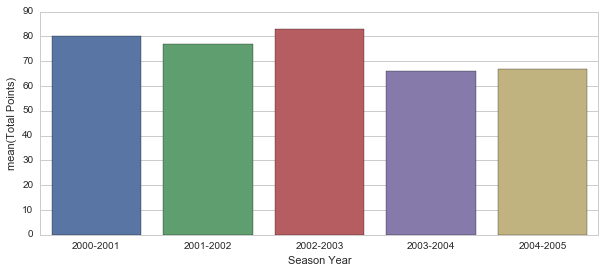

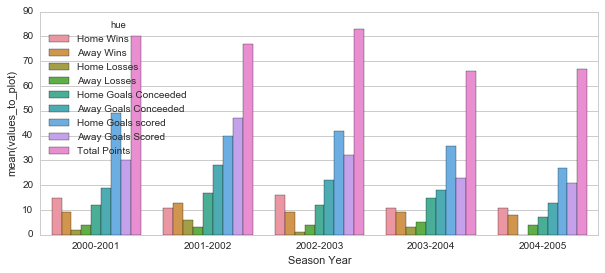

In [68]:
Team_Name = "Man United"

cntt = 0
#all_years = []
#data = list(range(0,10))
columns = ['Season Year', 'Home Wins','Away Wins','Home Losses','Away Losses','Home Goals Conceeded','Away Goals Conceeded','Home Goals scored','Away Goals Scored','Total Points']
all_years = pd.DataFrame(np.nan,index=[0], columns=columns)
#all_years = all_years.fillna(0)
single_year = list(range(10))

for file_ in glob("C:\Data Analysis\Sujay_DataAnalysis\Final\Data\*.csv",):
    print(file_)
    _EPL_ALL_ = pd.read_csv(file_,error_bad_lines=False)
    
    year = file_.split('\\')[-1].split('.')[0].split('_')[1]
    #print(year)
    #Analysis One Get only set of Data Needed
    Analysis_1_Data = _EPL_ALL_[['Date','HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR']]

    _All_Matches_ = Analysis_1_Data.loc[(Analysis_1_Data["HomeTeam"] == Team_Name) | (Analysis_1_Data["AwayTeam"] == Team_Name)]

    #single_year = _All_Matches_[['Date']]
    
    #Total_matches = _Team_Matches_.AwayTeam.count()

    _Home_Matches_ = _All_Matches_.loc[(_All_Matches_["HomeTeam"] == Team_Name)]
    _Away_Matches_ = _All_Matches_.loc[(_All_Matches_["AwayTeam"] == Team_Name)]

    #print("",_Home_Matches_)
    #print("\n\n\n\n")
    #print(_Away_Matches_)

    Home_Wins = _Home_Matches_.loc[(_Home_Matches_["FTR"] == "H")]
    Home_Win_Count = Home_Wins.FTR.count()

    Home_loss = _Home_Matches_.loc[(_Home_Matches_["FTR"] == "A")]
    Home_loss_Count = Home_loss.FTR.count()

    Home_draw = _Home_Matches_.loc[(_Home_Matches_["FTR"] == "D")]
    Home_draw_Count = Home_draw.FTR.count()

    #print("Home Wins = ",Home_Win_Count)
    #print("Home Loses = ",Home_loss_Count)


    Away_Wins = _Away_Matches_.loc[(_Away_Matches_["FTR"] == "A")]
    Away_Wins_Count = Away_Wins.FTR.count()


    Away_loss = _Away_Matches_.loc[(_Away_Matches_["FTR"] == "H")]
    Away_loss_Count = Away_loss.FTR.count()

    Away_draw = _Away_Matches_.loc[(_Away_Matches_["FTR"] == "D")]
    Away_draw_Count = Away_draw.FTR.count()

    #print("Away Wins = ",Away_Wins_Count)
    #print("Away Loses = ",Away_loss_Count)

    Home_Goals_scored = _Home_Matches_.FTHG.sum()
    Away_Goals_scored = _Away_Matches_.FTAG.sum()
    Home_Goals_conceeded = _Home_Matches_.FTAG.sum()
    Away_Goals_conceeded = _Away_Matches_.FTHG.sum()
    #print("Home Goals Conceeded = ",Home_Goals_conceeded)
    #print("Home Goals Scored = ",Home_Goals_scored)
    #print("Away Goals Scored = ",Away_Goals_scored)
    #print("Away Goals Conceeded = ",Away_Goals_conceeded)
    #print(Home_draw_Count)
    #print(Away_draw_Count)

    Total_Points = ((Home_Win_Count + Away_Wins_Count) * 3) + Home_draw_Count + Away_draw_Count
    #print("Total points in Season = ",Total_Points)
    
    #single_year.append(year)
    #single_year.append(Home_Win_Count)
    #single_year.append(Away_Wins_Count)
    #single_year.append(Home_loss_Count)
    #single_year.append(Away_loss_Count)
    #single_year.append(Home_Goals_conceeded)
    #single_year.append(Away_Goals_conceeded)
    #single_year.append(Home_Goals_scored)
    #single_year.append(Away_Goals_scored)
    #single_year.append(Total_Points)
    
    single_year[0] = year
    single_year[1] = Home_Win_Count
    single_year[2] = Away_Wins_Count
    single_year[3] = Home_loss_Count
    single_year[4] = Away_loss_Count
    single_year[5] = Home_Goals_conceeded
    single_year[6] = Away_Goals_conceeded
    single_year[7] = Home_Goals_scored
    single_year[8] = Away_Goals_scored
    single_year[9] = Total_Points
    
    
    single_df = pd.DataFrame([single_year],columns=columns)
    
    #single_year['Season Year'] = year
    #single_year['Home Wins'] = Home_Win_Count
    #single_year['Away Wins'] = Away_Wins_Count
    #single_year['Home Losses'] = Home_loss_Count
    #single_year['Away Losses'] = Away_loss_Count
    #single_year['Home Goals Conceeded'] = Home_Goals_conceeded
    #single_year['Away Goals Conceeded'] = Away_Goals_conceeded
    #single_year['Home Goals scored'] = Home_Goals_scored
    #single_year['Away Goals Scored'] = Away_Goals_scored
    #single_year['Total Points'] = Total_Points
    all_years = all_years.append([single_df],ignore_index=True)
    
    
    #print(single_year)
    cntt += 1
    if cntt == 5: break
        
    #print("\n\n")
    
#final_df = pd.concat(all_years)
#final_df
all_years = all_years.drop(all_years.index[0])
#all_years


#,hue='Total Points'

plt.subplots(figsize=(10,4))
sns.set_style('whitegrid')
sns.barplot(x='Season Year',y='Total Points',data=all_years)

all_years.reset_index()

all_years

req_cols = ['Home Wins', 'Away Wins', 'Home Losses', 'Away Losses','Home Goals Conceeded', 'Away Goals Conceeded', 'Home Goals scored','Away Goals Scored', 'Total Points']
all_df = []

for col in req_cols:
    temp_df = all_years[['Season Year',col]]
    temp_df = temp_df.rename(columns={col:'values_to_plot'})
    temp_df['hue'] = col
    all_df.append(temp_df)
f_df = pd.concat(all_df)



plt.subplots(figsize=(10,4))
sns.set_style('whitegrid')
sns.barplot(x='Season Year',y='values_to_plot',hue= 'hue',data=f_df)

In [213]:
all_years.reset_index()

,index,Season Year,Home Wins,Away Wins,Home Losses,Away Losses,Home Goals Conceeded,Away Goals Conceeded,Home Goals scored,Away Goals Scored,Total Points
0,1,2000-2001,15.0,9.0,2.0,4.0,12.0,19.0,49.0,30.0,80.0
1,2,2001-2002,11.0,13.0,6.0,3.0,17.0,28.0,40.0,47.0,77.0
2,3,2002-2003,16.0,9.0,1.0,4.0,12.0,22.0,42.0,32.0,83.0
3,4,2003-2004,11.0,9.0,3.0,5.0,15.0,18.0,36.0,23.0,66.0
4,5,2004-2005,11.0,8.0,0.0,4.0,7.0,13.0,27.0,21.0,67.0


In [69]:
f_df

,Season Year,values_to_plot,hue
1,2000-2001,15.0,Home Wins
2,2001-2002,11.0,Home Wins
3,2002-2003,16.0,Home Wins
4,2003-2004,11.0,Home Wins
5,2004-2005,11.0,Home Wins
1,2000-2001,9.0,Away Wins
2,2001-2002,13.0,Away Wins
3,2002-2003,9.0,Away Wins
4,2003-2004,9.0,Away Wins
5,2004-2005,8.0,Away Wins


In [ ]:
#Analysis 2 
#EPL_Managers

In [3]:
Team_Name1 = "Chelsea"

_manger_file_ = r"C:\Data Analysis\Sujay_DataAnalysis\Final\Manager\EPL_Managers.csv"
_Raw_file_ = pd.read_csv(_manger_file_)
_EPL_Managers_ = _Raw_file_[['Name','Club','From','Until','Duration (days)','Years in Premier League']]
#_EPL_Managers_.loc[['Club']]

#_Team_Managers_ = _EPL_Managers_.loc[(_EPL_Managers_["Club"] == Team_Name1
#_Team_Managers_ = _EPL_Managers_.loc[:,(['Club'] == Team_Name1)]
#_Team_Managers_
#
_Team_Managers_ = _EPL_Managers_[_EPL_Managers_['Club'] == Team_Name1]
#_EPL_Managers_.loc[(_EPL_Managers_['Club'] == Team_Name)]
#_Team_Managers_ = _EPL_Managers_.loc[(_EPL_Managers_["Club"])] 
#Name	Club	From	Until	Duration (days)	Years in Premier Leagu

ss  = _Team_Managers_[['Name','From','Until']]
rst = ss.reset_index(drop=True)
rst.loc[len(rst) - 1 :,'Until'] = datetime.now().strftime("%d-%b-%y")
rst['From'] = rst['From'].apply(lambda X: datetime.strptime(X, "%d-%b-%y").date().strftime("%d/%m/%y"))
rst['Until'] = rst['Until'].apply(lambda X: datetime.strptime(X, "%d-%b-%y").date().strftime("%d/%m/%y"))
#rst['FromEpoch'] = rst['FromEpoch'].apply(lambda X: datetime.strptime(X, "%d-%b-%y").timestamp())
#rst['UntilEpoch'] = rst['UntilEpoch'].apply(lambda X: datetime.strptime(X, "%d-%b-%y").timestamp())
rst

,Name,From,Until
0,Ian Porterfield,11/06/91,15/02/93
1,David Webb,15/02/93,11/05/93
2,Glenn Hoddle,04/06/93,10/05/96
3,Ruud Gullit,10/05/96,12/02/98
4,Gianluca Vialli,12/02/98,12/09/00
5,Graham Rix,13/09/00,17/09/00
6,Ray Wilkins,13/09/00,17/09/00
7,Claudio Ranieri,18/09/00,31/05/04
8,José Mourinho,02/06/04,20/09/07
9,Avram Grant,29/09/07,24/05/08


In [5]:
def my_test(x):
    #print(x)
    ret_str = ""
    temp = x.split('/')[-1]
    #print(temp)
    if temp <= '16':
        ret_str = "20" + str(temp)
    elif temp > '16':
        ret_str = "19" + str(temp)
    else:
        ret_str = str(temp)
    return ret_str

def change_time(time):
    return datetime.strptime(time, "%d/%m/%y").timestamp()
    
    
year1 = rst[['From','Until']]
year1['StartYear'] = year1.apply(lambda X: my_test(X['From']), axis=1)
year1['EndYear'] = year1.apply(lambda X: my_test(X['Until']), axis=1)

year1['FromEpoch'] = year1.apply(lambda X: change_time(X['From']), axis=1)
year1['UntilEpoch'] = year1.apply(lambda X: change_time(X['Until']), axis=1)


##year1['From'] = year1['From'].apply(lambda X: datetime.strptime(X, "%d/%m/%y").date().strftime("%d/%m/%y"))
#year1['From'] = year1['From'].apply(lambda X: datetime.strptime(X, "%d/%m/%y").timestamp())
#year1['Until'] = year1['Until'].apply(lambda X: datetime.strptime(X, "%d-%b-%y").date().strftime("%d/%m/%y"))


#year = year1.From.apply(lambda x: x.split('-')[-1])
#ytf = year.to_frame()
#df1 = ytf.rename(columns={'From':'MinYears'})
#df1
#year = year1.MinYears.apply(year1.From.apply(lambda x: x.split('-')[-1]))


##year1['Until'] = year1['Until'].apply(lambda y: datetime.strptime(y,"%d/%m/%y").date().strftime("%d/%m/%y"))
#year1['Until'] = year1['Until'].apply(lambda y: datetime.strptime(y,"%d/%m/%y").timestamp())

year1
#df.apply(lambda row: my_test(row['a'], row['c']), axis=1)

,From,Until,StartYear,EndYear,FromEpoch,UntilEpoch
0,11/06/91,15/02/93,1991,1993,6.766128e+08,7.297524e+08
1,15/02/93,11/05/93,1993,1993,7.297524e+08,7.370928e+08
2,04/06/93,10/05/96,1993,1996,7.391664e+08,8.317008e+08
3,10/05/96,12/02/98,1996,1998,8.317008e+08,8.872596e+08
4,12/02/98,12/09/00,1998,2000,8.872596e+08,9.687312e+08
5,13/09/00,17/09/00,2000,2000,9.688176e+08,9.691632e+08
6,13/09/00,17/09/00,2000,2000,9.688176e+08,9.691632e+08
7,18/09/00,31/05/04,2000,2004,9.692496e+08,1.085976e+09
8,02/06/04,20/09/07,2004,2007,1.086149e+09,1.190261e+09
9,29/09/07,24/05/08,2007,2008,1.191038e+09,1.211602e+09


In [6]:
#ss.reset_index(drop=True)['From'].to_frame().From.apply(lambda x: x.split('-')[-1] <= '16')

#ss[ss['From'].split('-')[-1] <= '16']
#ss[ss['From'].reset_index(drop=True)[0].split('-')[-1] <= '16']

#ss.reset_index(drop=True)
#ss.merge(year.to_frame())
#ss

fin = pd.merge(rst,year1)

_MANGERS_and_Year = fin[fin['StartYear'] >= '2000'].reset_index(drop=True)
_MANGERS_and_Year

,Name,From,Until,StartYear,EndYear,FromEpoch,UntilEpoch
0,Graham Rix,13/09/00,17/09/00,2000,2000,9.688176e+08,9.691632e+08
1,Graham Rix,13/09/00,17/09/00,2000,2000,9.688176e+08,9.691632e+08
2,Ray Wilkins,13/09/00,17/09/00,2000,2000,9.688176e+08,9.691632e+08
3,Ray Wilkins,13/09/00,17/09/00,2000,2000,9.688176e+08,9.691632e+08
4,Claudio Ranieri,18/09/00,31/05/04,2000,2004,9.692496e+08,1.085976e+09
5,José Mourinho,02/06/04,20/09/07,2004,2007,1.086149e+09,1.190261e+09
6,Avram Grant,29/09/07,24/05/08,2007,2008,1.191038e+09,1.211602e+09
7,Luiz Felipe Scolari,01/07/08,09/02/09,2008,2009,1.214885e+09,1.234156e+09
8,Ray Wilkins,09/02/09,16/02/09,2009,2009,1.234156e+09,1.234760e+09
9,Guus Hiddink,16/02/09,31/05/09,2009,2009,1.234760e+09,1.243742e+09


In [7]:
temp  = _MANGERS_and_Year[['Name','From','Until','StartYear','EndYear','FromEpoch','UntilEpoch']]
_MANGERS_TO_ANALYSE_ = temp.drop_duplicates().reset_index(drop=True)
_MANGERS_TO_ANALYSE_

,Name,From,Until,StartYear,EndYear,FromEpoch,UntilEpoch
0,Graham Rix,13/09/00,17/09/00,2000,2000,9.688176e+08,9.691632e+08
1,Ray Wilkins,13/09/00,17/09/00,2000,2000,9.688176e+08,9.691632e+08
2,Claudio Ranieri,18/09/00,31/05/04,2000,2004,9.692496e+08,1.085976e+09
3,José Mourinho,02/06/04,20/09/07,2004,2007,1.086149e+09,1.190261e+09
4,Avram Grant,29/09/07,24/05/08,2007,2008,1.191038e+09,1.211602e+09
5,Luiz Felipe Scolari,01/07/08,09/02/09,2008,2009,1.214885e+09,1.234156e+09
6,Ray Wilkins,09/02/09,16/02/09,2009,2009,1.234156e+09,1.234760e+09
7,Guus Hiddink,16/02/09,31/05/09,2009,2009,1.234760e+09,1.243742e+09
8,Carlo Ancelotti,01/06/09,22/05/11,2009,2011,1.243829e+09,1.306037e+09
9,André Villas-Boas,22/06/11,04/03/12,2011,2012,1.308715e+09,1.330837e+09


In [8]:
name = _MANGERS_TO_ANALYSE_.loc[0,:].to_frame().transpose()['Name']
name

0    Graham Rix
Name: Name, dtype: object

In [9]:
_MANGERS_TO_ANALYSE_.loc[14,:].to_frame().transpose()['StartYear']

14    2016
Name: StartYear, dtype: object

In [10]:
start_year = str(2016)

ggg = _MANGERS_TO_ANALYSE_.loc[(_MANGERS_TO_ANALYSE_['StartYear'] == start_year)]['Name']
hhh = ggg.to_string().split(' ')[-2:]
jjj = ' '.join(hhh)


#aaa = ['abc','efg']

#bbb = ''.join(aaa)
#fgh = [''.join(x) for x in aaa]
#bbb

jjj

'Antonio Conte'

In [11]:
NUmber_of_Managers = len(_MANGERS_TO_ANALYSE_)
NUmber_of_Managers



15

In [ ]:
#Number of Wins, Number of Losses, Number of Goals per season, Total Number of League Matches,  Win %

In [14]:
def change_time_epoch(time):
    #print(time)
    return datetime.strptime(time, "%d/%m/%y").timestamp()

def change_time_epoch2(time):
    #print(time)
    #print("In Functions \n\n",_All_Match_)
    return datetime.strptime(time, "%d/%m/%Y").timestamp()

def Get_Current_Manger(int_start_year, int_end_year):
    #leeee = len(_MANGERS_TO_ANALYSE_)
    #print(leeee)
    start_year = str(int_start_year)

    Start_year_list = _MANGERS_TO_ANALYSE_.loc[(_MANGERS_TO_ANALYSE_['StartYear'] == start_year)]['Name']
    Manager_name_split = Start_year_list.to_string().split(' ')[-2:]
    Manager_name = ' '.join(Manager_name_split)

    #cuu_man = _MANGERS_TO_ANALYSE_.loc[leeee -1,:].to_frame().transpose()['Name']
    #print(Manager_name)
    return Manager_name
    
    
def Get_manager(match_epoch, manager_start,manager_end,name):
    Match_day_str = str(match_epoch).split(' ')[-1]   #'990244800.0'
    Manger_start_str = str(float(manager_start.to_string().split(' ')[-1]))   #'9.68818e+08'
    Manger_end_str = str(float(manager_end.to_string().split(' ')[-1]))   #'9.68818e+08'
    
    #print(Match_day_str)
    #print(Manger_start_str)
    #print(Manger_end_str)
    
    if float(Match_day_str) > float(Manger_start_str):
        #print("========================")
        #print(Match_day_str)
        #print(Manger_end_str)
        #print("========================")
        if float(Match_day_str) < float(Manger_end_str):
            #print("Manager in Charge")
            #print("\n\n")
            return name
    else:
        #print("Manger was not in charge")
        print("")
        
    #print(" ")
    
    return "Interim Managers"

cnt = 0

Base_File_Name = "C:\Data Analysis\Sujay_DataAnalysis\Final\Data\\"

Number_of_Managers = len(_MANGERS_TO_ANALYSE_)

for manager_number in range(0,Number_of_Managers):

    #for cnt in range(0,NUmber_of_Managers):
    name = _MANGERS_TO_ANALYSE_.loc[manager_number,:].to_frame().transpose()['Name']
    #print(name)
    Start_year = _MANGERS_TO_ANALYSE_.loc[manager_number,:].to_frame().transpose()['StartYear']
    End_year = _MANGERS_TO_ANALYSE_.loc[manager_number,:].to_frame().transpose()['EndYear']
    #print(Start_year)
    int_start_year = int(Start_year)
    int_end_year = int(End_year)

    Start_date = _MANGERS_TO_ANALYSE_.loc[manager_number,:].to_frame().transpose()['FromEpoch']
    End_date = _MANGERS_TO_ANALYSE_.loc[manager_number,:].to_frame().transpose()['UntilEpoch'] 

    No_seasons_in_Charge = int_end_year - int_start_year
    end = int_start_year + 1
    FIle_Name = Base_File_Name + "EPL" + "_" + str(int_start_year) + "-" + str(end) + ".csv"
    #print(FIle_Name)
    Season_file = pd.read_csv(FIle_Name,error_bad_lines=False)

    Analysis_2_Data = Season_file[['Date','HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR']]

    _All_Matches_ = Analysis_2_Data.loc[(Analysis_2_Data["HomeTeam"] == Team_Name1) | (Analysis_2_Data["AwayTeam"] == Team_Name1)]

    not_first_time = False

    if No_seasons_in_Charge == 0:
        #print("Managers for only one year \n\n")
        _All_Matches_['DateEpoch'] = _All_Matches_.apply(lambda X: change_time_epoch(X['Date']), axis=1)

        matches_length = len(_All_Matches_['DateEpoch'])

        #_All_Matches_['Manager'] = _All_Matches_.apply(lambda X: Get_manager(X['DateEpoch'],Start_date,End_date,name), axis=1)
        _All_Matches_['Manager'] = _All_Matches_.apply(lambda Y: Get_Current_Manger(int_start_year, int_end_year), axis=1)
        base_file = r"C:\Data Analysis\Sujay_DataAnalysis\Final\Manager_season\\"
        Manager_season_file1 = base_file + "Managers_" + "EPL" + "_" + str(int_start_year) + "-" + str(int_start_year + 1) + ".csv"
            
        _All_Matches_.to_csv(Manager_season_file1, sep=',', encoding='utf-8')
            
    else:
        #print("Managers for Years \n\n")
    
        for season_in_charge in range(0,No_seasons_in_Charge + 1):
            
            #int_start_year = 0
            #int_end_year = 0
            
            #print("not_first_time = ", not_first_time)
            if not_first_time:

                int_start_year = int(Current_year) + 1
                int_end_year = int_start_year + 1
                FIle_Name = Base_File_Name + "EPL" + "_" + str(int_start_year) + "-" + str(int_end_year) + ".csv"
                #print(FIle_Name)
                Season_file = pd.read_csv(FIle_Name,error_bad_lines=False)     
                Analysis_2_Data = Season_file[['Date','HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR']]

                _All_Matches_ = Analysis_2_Data.loc[(Analysis_2_Data["HomeTeam"] == Team_Name1) | (Analysis_2_Data["AwayTeam"] == Team_Name1)]
                #print(_All_Matches_)

            
            date1 = list(_All_Matches_.reset_index(drop=True).loc[0,:].to_frame().transpose()['Date'].to_string().split('/')[-1])

            format_lenght_1 = len(date1)

            if format_lenght_1 > 2:
                _All_Matches_['DateEpoch'] = _All_Matches_.apply(lambda X: change_time_epoch2(X['Date']), axis=1)
            else:
                _All_Matches_['DateEpoch'] = _All_Matches_.apply(lambda X: change_time_epoch(X['Date']), axis=1)
    
    
    
            #_All_Matches_['DateEpoch'] = _All_Matches_.apply(lambda X: change_time_epoch(X['Date']), axis=1)

            #print(_All_Matches_)
            
            matches_length = len(_All_Matches_['DateEpoch'])

            #if season_in_charge == No_seasons_in_Charge:  #Last Year show current Manager
            #    _All_Matches_['Manager'] = _All_Matches_.apply(lambda Y: Get_Current_Manger(int_start_year, int_end_year), axis=1)
            #else:
            
            _All_Matches_['Manager'] = _All_Matches_.apply(lambda X: Get_manager(X['DateEpoch'],Start_date,End_date,name), axis=1)
                
            not_first_time = True
            base_file = r"C:\Data Analysis\Sujay_DataAnalysis\Final\Manager_season\\"
            Manager_season_file = base_file + "Managers_" + "EPL" + "_" + str(int_start_year) + "-" + str(int_start_year + 1) + ".csv"
            
            _All_Matches_.to_csv(Manager_season_file, sep=',', encoding='utf-8')
            Current_year = int_start_year
            #_All_Matches_.drop(['Date','HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR'],axis=1)
    
        not_first_time = False
        
        
    #cnt += 1
    #if cnt == 10: break
    
    
    
    #for match_count in range(0,matches_length):
        #dateee = _All_Matches_['DateEpoch'].to_frame().reset_index(drop=True).loc[match_count:match_count]
        #match_Epoch = change_time_epoch(dateee.to_string())
        
        #print("Start_date = ",Start_date)
        #print("dateee.DateEpoch = ", dateee.DateEpoch)
        
        #if dateee.DateEpoch.apply(basestring) <= Start_date.apply(str):
            #print("First - ",match_count)
            #print("\n\n")
        #else:
            #print("Second - ",match_count)
            #print("\n\n")
            #continue
        
        
        
    #New_data = _All_Matches_.loc[(_All_Matches_['Date'] >= Start_date)]
    #_All_Matches_['Date']
    
#dateee.DateEpoch < Start_date

#_All_Matches_
#Start_date == "13/09/00"
#0    13/09/00
#Name: From, dtype: object
#6    09/02/09
#Name: From, dtype: object

_All_Matches_
#dateee.DateEpoch.any()
#if dateee.DateEpoch >= Start_date:
#    print("Yes!!!")
    
#print(str(Start_date))
#print(str(dateee.DateEpoch))

#if str(dateee.DateEpoch) >= str(Start_date):
#    print("Yes!!!")
    
    
#matches_length


#da = dateee.to_string().split(' ')[-1]   #'990244800.0'
#st = Start_date.to_string().split(' ')[-1]   #'9.68818e+08'

# da < st



#0    9.68818e+08
#Name: FromEpoch, dtype: object
#    19/08/00
#Name: Date, dtype: object


#dttime = datetime.strptime(dateee.Date.to_string(),"%d/%m/%y")
#arr = dateee.Date.values()

#arr = dateee.values
#np.array_str.strip("[]")(arr[0])
#np.array_str(arr[0])
#arr1 = Start_date 
#np.array_str(arr1[0])
#arr1
#arr	13/09/00	17/09/00	2000	2000	9.688176e+08	9.691632e+08

C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel\__main__.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel\__main__.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel\__main__.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-

C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel\__main__.py:122: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
b'Skipping line 305: expected 57 fields, saw 72\nSkipping line 306: expected 57 fields, saw 72\nSkipping line 307: expected 57 fields, saw 72\nSkipping line 308: expected 57 fields, saw 72\nSkipping line 309: expected 57 fields, saw 72\nSkipping line 310: expected 57 fields, saw 72\nSkipping line 311: expected 57 fields, saw 72\nSkipping line 312: expected 57 fields, saw 72\nSkipping line 313: expected 57 fields, saw 72\nSkipping line 314: expected 57 fields, saw 72\nSkipping line 315: expected 57 fields, saw 72\nSkipping line 316: expected 57 fields, saw 72\nSkipping line 317: expected 57 fields, saw 72\nSkipping line 318: expected 57 fields, saw 72\nSk

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,DateEpoch,Manager
9,15/08/16,Chelsea,West Ham,2,1,H,0,0,D,1.471234e+09,Antonio Conte
16,20/08/16,Watford,Chelsea,1,2,A,0,0,D,1.471666e+09,Antonio Conte
20,27/08/16,Chelsea,Burnley,3,0,H,2,0,H,1.472270e+09,Antonio Conte
38,11/09/16,Swansea,Chelsea,2,2,D,0,1,A,1.473566e+09,Antonio Conte
40,16/09/16,Chelsea,Liverpool,1,2,A,0,2,A,1.473998e+09,Antonio Conte
50,24/09/16,Arsenal,Chelsea,3,0,H,3,0,H,1.474690e+09,Antonio Conte
61,01/10/16,Hull,Chelsea,0,2,A,0,0,D,1.475294e+09,Antonio Conte
72,15/10/16,Chelsea,Leicester,3,0,H,2,0,H,1.476504e+09,Antonio Conte
88,23/10/16,Chelsea,Man United,4,0,H,2,0,H,1.477195e+09,Antonio Conte
98,30/10/16,Southampton,Chelsea,0,2,A,0,1,A,1.477800e+09,Antonio Conte


In [15]:
def Change_manager_str(Manager):
    #print("Manger Before = ",Manager)
    temp1 = "";temp2 = ""; temp3 = ""
    
    
    if '[' in Manager:
        temp1 = Manager.replace('[','')
    
    if ']' in temp1:
        temp2 = temp1.replace(']','')
    
    if '\'' in temp2:
        temp3 = temp2.replace('\'','')
        #print("Manger _changed = ",temp3)
        return temp3
    
    
    #print("Manger _changed = ",Manager)
    return Manager
    
    
    
Manager_columns = ['Manager', 'Wins','Losses','Goals Conceeded','Goals scored']
all_years_managers = pd.DataFrame(np.nan,index=[0], columns=Manager_columns)
#all_years = all_years.fillna(0)
single_year_manager = list(range(5))
cnt1 =0

for Manager_file_ in glob("C:\Data Analysis\Sujay_DataAnalysis\Final\Manager_season\*.csv",):
    #print(Manager_file_)
    _Manager_ALL_ = pd.read_csv(Manager_file_,error_bad_lines=False)
    
    year = Manager_file_.split('\\')[-1].split('.')[0].split('_')[1]
    #print(year)
    #Analysis One Get only set of Data Needed
    
    
    All_Manager_Data = _Manager_ALL_[['Date','HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR','Manager']]
    
    All_Manager_Data["Manager"] = All_Manager_Data.apply(lambda X: Change_manager_str(X['Manager']), axis=1)
    Managers_Names = All_Manager_Data['Manager'].unique()
    Number_of_mangers = len(Managers_Names)
        
    #print(All_Manager_Data)
    for count_manager in range(0,Number_of_mangers):
        
        Manager_name = Managers_Names[count_manager]
        #print(str(Manager_name))
        
        Manager_Data = All_Manager_Data.loc[(All_Manager_Data["Manager"] == Manager_name)]
        #print(Manager_Data)
        _Home_Matches_ = Manager_Data.loc[(Manager_Data["HomeTeam"] == Team_Name1)]
        _Away_Matches_ = Manager_Data.loc[(Manager_Data["AwayTeam"] == Team_Name1)]


        Home_Wins = _Home_Matches_.loc[(_Home_Matches_["FTR"] == "H")]
        Home_Win_Count = Home_Wins.FTR.count()

        Home_loss = _Home_Matches_.loc[(_Home_Matches_["FTR"] == "A")]
        Home_loss_Count = Home_loss.FTR.count()

        Away_Wins = _Away_Matches_.loc[(_Away_Matches_["FTR"] == "A")]
        Away_Wins_Count = Away_Wins.FTR.count()

        Away_loss = _Away_Matches_.loc[(_Away_Matches_["FTR"] == "H")]
        Away_loss_Count = Away_loss.FTR.count()

        Home_Goals_scored = _Home_Matches_.FTHG.sum()
        Away_Goals_scored = _Away_Matches_.FTAG.sum()
        Home_Goals_conceeded = _Home_Matches_.FTAG.sum()
        Away_Goals_conceeded = _Away_Matches_.FTHG.sum()

        #print("Home Wins = ",Home_Win_Count)
        #print("Home Loses = ",Home_loss_Count)
        #print("Away_Wins = ",Away_Wins_Count)
        #print("Away Loses = ",Away_loss_Count)
        #print("Home_Goals_scored = ",Home_Goals_scored)
        #print("Away Goals scored = ",Away_Goals_scored)
        #print("Home_Goals_conceeded = ",Home_Goals_conceeded)
        #print("Away_Goals_conceeded= ",Away_Goals_conceeded)
        #[print(Manager_Data['Manager'].unique()[0:]) for x in Manager_Data['Manager'].unique()]
        #print("\n\n")

        Total_Wins = Home_Win_Count + Away_Wins_Count
        Total_Loss = Home_loss_Count + Away_loss_Count
        Total_Goals_Scored = Home_Goals_scored + Away_Goals_scored
        Total_Goals_Conceeded = Home_Goals_conceeded + Away_Goals_conceeded
        
        single_year_manager[0] = Manager_name
        single_year_manager[1] = Total_Wins
        single_year_manager[2] = Total_Loss
        single_year_manager[3] = Total_Goals_Conceeded
        single_year_manager[4] = Total_Goals_Scored

        single_df = pd.DataFrame([single_year_manager],columns=Manager_columns)
        all_years_managers = all_years_managers.append([single_df],ignore_index=True)
    
    #cnt1 += 1
    #if cnt1 == 2: break

#all_years_managers

all_years_managers = all_years_managers.drop(all_years_managers.index[0])
all_years_managers

C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel\__main__.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Manager,Wins,Losses,Goals Conceeded,Goals scored
1,Interim Managers,1.0,2.0,9.0,7.0
2,Claudio Ranieri,16.0,9.0,36.0,61.0
3,Claudio Ranieri,17.0,8.0,38.0,66.0
4,Claudio Ranieri,19.0,9.0,38.0,68.0
5,Claudio Ranieri,22.0,6.0,27.0,63.0
6,José Mourinho,25.0,1.0,12.0,62.0
7,José Mourinho,29.0,5.0,22.0,72.0
8,José Mourinho,24.0,3.0,24.0,64.0
9,Interim Managers,3.0,2.0,8.0,7.0
10,Avram Grant,22.0,1.0,18.0,58.0


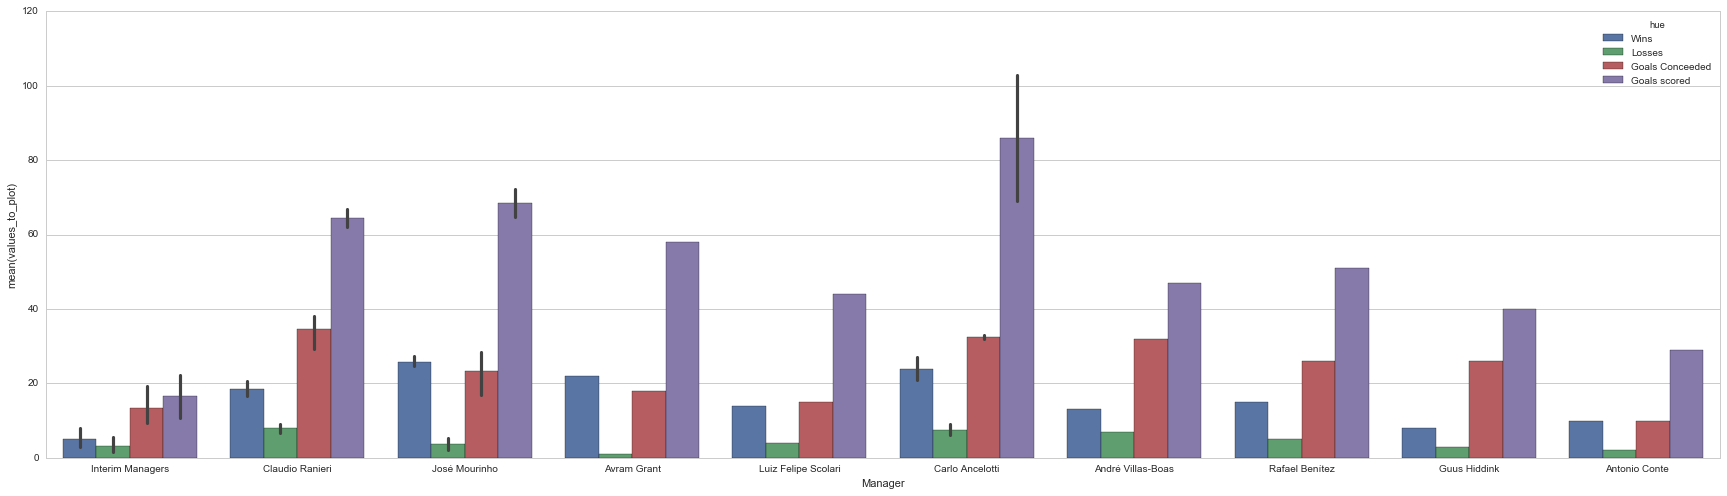

In [50]:

req_cols = ['Wins','Losses','Goals Conceeded', 'Goals scored']
all_df = []

for col in req_cols:
    temp_df = all_years_managers[['Manager',col]]
    temp_df = temp_df.rename(columns={col:'values_to_plot'})
    temp_df['hue'] = col
    all_df.append(temp_df)
f_df = pd.concat(all_df)


plt.subplots(figsize=(30,8))
sns.set_style('whitegrid')
sns.barplot(x='Manager',y='values_to_plot',hue= 'hue',data=f_df)
#sns.stripplot(x='Manager',y='values_to_plot',hue= 'hue',data=f_df,jitter=True)

In [225]:
all_years


,Season Year,Home Wins,Away Wins,Home Losses,Away Losses,Home Goals Conceeded,Away Goals Conceeded,Home Goals scored,Away Goals Scored,Total Points
1,2000-2001,15.0,9.0,2.0,4.0,12.0,19.0,49.0,30.0,80.0
2,2001-2002,11.0,13.0,6.0,3.0,17.0,28.0,40.0,47.0,77.0
3,2002-2003,16.0,9.0,1.0,4.0,12.0,22.0,42.0,32.0,83.0
4,2003-2004,11.0,9.0,3.0,5.0,15.0,18.0,36.0,23.0,66.0
5,2004-2005,11.0,8.0,0.0,4.0,7.0,13.0,27.0,21.0,67.0


In [66]:
f_df

,Manager,values_to_plot,hue
1,Interim Managers,1.0,Wins
2,Claudio Ranieri,16.0,Wins
3,Claudio Ranieri,17.0,Wins
4,Claudio Ranieri,19.0,Wins
5,Claudio Ranieri,22.0,Wins
6,José Mourinho,25.0,Wins
7,José Mourinho,29.0,Wins
8,José Mourinho,24.0,Wins
9,Interim Managers,3.0,Wins
10,Avram Grant,22.0,Wins


In [82]:
type(Manager_Data['Manager'].unique()[0])

str

In [181]:
_All_Matches_.reset_index(drop=True)

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR


In [132]:
mm = All_Manager_Data['Manager']
ll = mm.unique()
ll

array(['Interim Managers', "['Claudio Ranieri']"], dtype=object)

In [124]:
Manager_Data.loc[Manager_Data["Manager"] == "Interim Managers"]

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Manager


In [135]:
All_Manager_Data.loc[All_Manager_Data["Manager"] == "Interim Managers"]

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Manager
0,19/08/00,Chelsea,West Ham,4,2,H,1,0,H,Interim Managers
1,22/08/00,Bradford,Chelsea,2,0,H,1,0,H,Interim Managers
2,27/08/00,Aston Villa,Chelsea,1,1,D,1,1,D,Interim Managers
3,06/09/00,Chelsea,Arsenal,2,2,D,1,0,H,Interim Managers
4,09/09/00,Newcastle,Chelsea,0,0,D,0,0,D,Interim Managers
5,17/09/00,Chelsea,Leicester,0,2,A,0,1,A,Interim Managers


In [151]:
g1 = "['Claudio Ranieri']"
if '[' in g1:
    g2 = g1.replace('[','')
    
if ']' in g2:
    g3 = g2.replace(']','')

if '\'' in g3:
    g4 = g3.replace('\'','')
    
#g4 = g3.replace('\'','')
g4

'Claudio Ranieri'

In [ ]:
#Analysis 3  Goals 

In [108]:
Goals_file = pd.read_csv(r"C:\Data Analysis\Sujay_DataAnalysis\Final\Goals\Goal_time_2005-2006.csv")

Goals_file = Goals_file.rename(columns={'Unnamed: 0': 'Teams'})
Goals_file = Goals_file.rename(columns={'0-10': 'Far_in_10_seconds'})
Goals_file = Goals_file.rename(columns={'0-10.1': 'Aganist in 10 seconds'})
Goals_file = Goals_file.rename(columns={'20-Nov': 'Far in 20 seconds'})
Goals_file = Goals_file.rename(columns={'20-Nov.1': 'Aganist in 20 seconds'})
Goals_file = Goals_file.rename(columns={'21-30': 'Far in 30 seconds'})
Goals_file = Goals_file.rename(columns={'21-30.1': 'Aganist in 30 seconds'})
Goals_file = Goals_file.rename(columns={'31-40': 'Far in 40 seconds'})
Goals_file = Goals_file.rename(columns={'31-40.1': 'Aganist in 40 seconds'})
Goals_file = Goals_file.rename(columns={'41-50': 'Far in 50 seconds'})
Goals_file = Goals_file.rename(columns={'41-50.1': 'Aganist in 50 seconds'})
Goals_file = Goals_file.rename(columns={'51-60': 'Far in 60 seconds'})
Goals_file = Goals_file.rename(columns={'51-60.1': 'Aganist in 60 seconds'})
Goals_file = Goals_file.rename(columns={'61-70': 'Far in 70 seconds'})
Goals_file = Goals_file.rename(columns={'61-70.1': 'Aganist in 70 seconds'})
Goals_file = Goals_file.rename(columns={'71-80': 'Far in 80 seconds'})
Goals_file = Goals_file.rename(columns={'71-80.1': 'Aganist in 80 seconds'})
Goals_file = Goals_file.rename(columns={'81-90': 'Far in 90 seconds'})
Goals_file = Goals_file.rename(columns={'81-90.1': 'Aganist in 90 seconds'})

Goals_file


,Teams,Far_in_10_seconds,Aganist in 10 seconds,Far in 20 seconds,Aganist in 20 seconds,Far in 30 seconds,Aganist in 30 seconds,Far in 40 seconds,Aganist in 40 seconds,Far in 50 seconds,Aganist in 50 seconds,Far in 60 seconds,Aganist in 60 seconds,Far in 70 seconds,Aganist in 70 seconds,Far in 80 seconds,Aganist in 80 seconds,Far in 90 seconds,Aganist in 90 seconds
0,NaN,F,A,F,A,F,A,F,A,F,A,F,A,F,A,F,A,F,A
1,Arsenal,4,1,10,5,7,3,9,7,8,1,5,2,2,2,8,8,15,2
2,Aston Villa,4,6,5,4,3,8,2,4,5,8,5,5,6,5,6,5,6,10
3,Birmingham,4,5,3,9,2,2,5,2,1,8,1,3,2,10,5,7,5,4
4,Blackburn,3,5,7,3,1,2,8,4,7,8,6,2,6,11,7,4,6,3
5,Bolton,5,5,5,1,3,2,8,3,5,7,2,7,6,4,8,5,7,7
6,Charlton,1,3,3,9,5,6,5,9,8,5,2,8,5,7,5,4,7,4
7,Chelsea,3,3,4,3,11,2,4,2,9,6,11,2,11,1,14,2,5,1
8,Everton,6,2,5,7,4,3,4,3,5,12,4,3,1,6,0,7,5,6
9,Fulham,6,5,5,8,9,7,3,5,6,5,7,5,2,4,2,7,8,12


In [86]:
das = pd.read_csv(r"C:\Data Analysis\Sujay_DataAnalysis\Final\Goals\Goal_time_2005-2006.csv")
das['0-10']


0     F
1     4
2     4
3     4
4     3
5     5
6     1
7     3
8     6
9     6
10    4
11    6
12    8
13    3
14    3
15    3
16    4
17    3
18    3
19    4
20    8
Name: 0-10, dtype: object

In [146]:
   
#Analysis One Get only set of Data Needed
Analysis_3_Data = Goals_file[:]


#_All_Goal_ = Analysis_3_Data.loc[(Analysis_1_Data["Unnamed: 0"] == 'Arsenal')]
_All_Goal_ = Analysis_3_Data.loc[(Analysis_3_Data['Teams'] == 'Arsenal') | (Analysis_3_Data['Teams'] == 'Chelsea') | (Analysis_3_Data['Teams'] == 'Manchester United') | (Analysis_3_Data['Teams'] == 'Liverpool') | (Analysis_3_Data['Teams'] == 'Manchester City')]
_All_Goal_ = _All_Goal_.reset_index(drop=True)
_All_Goal_['Far_in_10_seconds'] = _All_Goal_.Far_in_10_seconds.apply(lambda Y: int(Y))
_All_Goal_ = _All_Goal_.reset_index(drop=True)
_All_Goal_

,index,Teams,Far_in_10_seconds,Aganist in 10 seconds,Far in 20 seconds,Aganist in 20 seconds,Far in 30 seconds,Aganist in 30 seconds,Far in 40 seconds,Aganist in 40 seconds,Far in 50 seconds,Aganist in 50 seconds,Far in 60 seconds,Aganist in 60 seconds,Far in 70 seconds,Aganist in 70 seconds,Far in 80 seconds,Aganist in 80 seconds,Far in 90 seconds,Aganist in 90 seconds
0,1,Arsenal,4,1,10,5,7,3,9,7,8,1,5,2,2,2,8,8,15,2
1,7,Chelsea,3,3,4,3,11,2,4,2,9,6,11,2,11,1,14,2,5,1
2,10,Liverpool,4,1,6,1,5,3,6,2,7,5,7,2,5,3,6,2,11,6
3,11,Manchester City,6,5,5,2,3,4,7,7,1,8,3,7,8,3,4,5,6,7
4,12,Manchester United,8,5,10,1,4,4,9,7,10,2,5,4,10,1,6,6,10,4


In [147]:
plot_df = _All_Goal_[['Teams','Far_in_10_seconds']]

#plot_df = plot_df.Far_in_10_seconds

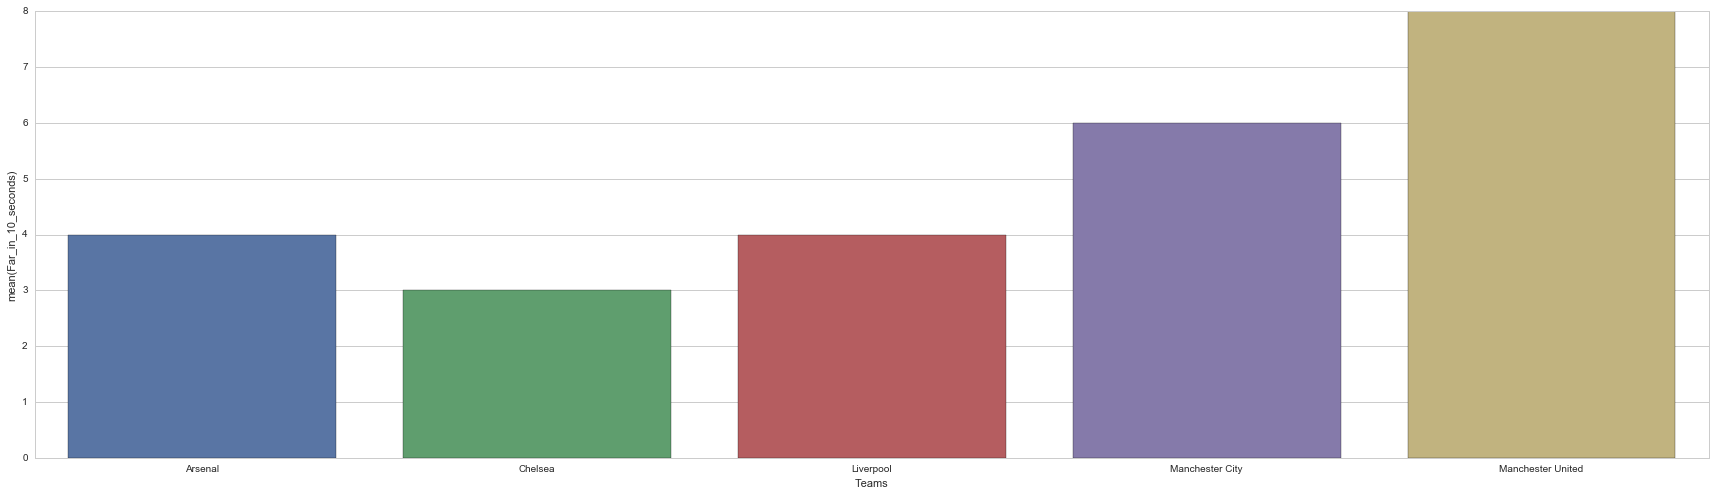

In [148]:
plt.subplots(figsize=(30,8))
sns.set_style('whitegrid')
axxx = sns.barplot(x="Teams",y="Far_in_10_seconds",data=plot_df)

ValueError: invalid literal for int() with base 10: 'F'

In [44]:
#Analysis 3 Goals data
Goal_team_Name = "Chelsea"


if Goal_team_Name == 'Chelsea':
    Team1 = 'Chelsea'
    


for Goal_file_ in glob("C:\Data Analysis\Sujay_DataAnalysis\Final\Goals\*.csv",):
    
    Goals_df = pd.read_csv(Goal_file_)

    Goals_Data = Goals_file.rename(columns={'Unnamed: 0': 'Teams'})
    _TOP_Team_Goal_ = Analysis_3_Data.loc[(Analysis_3_Data['Teams'] == 'Arsenal') | (Analysis_3_Data['Teams'] == 'Chelsea') | (Analysis_3_Data['Teams'] == 'Manchester United') | (Analysis_3_Data['Teams'] == 'Liverpool') | (Analysis_3_Data['Teams'] == 'Manchester City')]
    _All_Goal_
    print(Goals_Data)

                   Teams 0-10 0-10.1 20-Nov 20-Nov.1 21-30 21-30.1 31-40  \
0                    NaN    F      A      F        A     F       A     F   
1                Arsenal    4      1     10        5     7       3     9   
2            Aston Villa    4      6      5        4     3       8     2   
3             Birmingham    4      5      3        9     2       2     5   
4              Blackburn    3      5      7        3     1       2     8   
5                 Bolton    5      5      5        1     3       2     8   
6               Charlton    1      3      3        9     5       6     5   
7                Chelsea    3      3      4        3    11       2     4   
8                Everton    6      2      5        7     4       3     4   
9                 Fulham    6      5      5        8     9       7     3   
10             Liverpool    4      1      6        1     5       3     6   
11       Manchester City    6      5      5        2     3       4     7   
12     Manch

In [48]:

    
gf = pd.read_csv(r"C:\Data Analysis\Sujay_DataAnalysis\Final\League_Table\Table_2006_2007.csv")

#tab = gf.rename(columns={'Unnamed: 0': 'Teams'})
gf

OSError: Expected file path name or file-like object, got <class 'bytes'> type

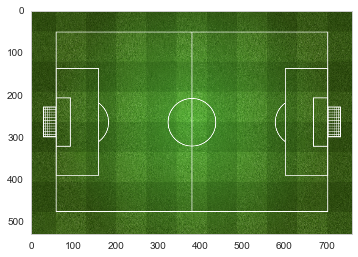

In [62]:
#import os,sys
#import Image
#im = Image.open('C:\Users\Hp\Desktop\py1.png')

#im.show()

#import numpy as np
#import cv2

# Load an color image in grayscale
#img = cv2.imread(r'C:\Users\Hp\Desktop\py1.png',0)
#cv2.imshow('image',img)


import matplotlib.pyplot as plt
img = plt.imread(r"C:\Data Analysis\Sujay_DataAnalysis\Final\football_pitch.png")
fig, ax = plt.subplots()
ax.grid(False)
ax.imshow(img)

In [136]:
sns.set_style("whitegrid")
tips = sns.load_dataset("tips")
tips['test'] = [0,1,2,3,4]
tips['test'] = tips.test.apply(lambda Y: [int(X) for X in _All_Goal_['Far_in_10_seconds']])
tips.head()

ValueError: Length of values does not match length of index

In [134]:
ss = _All_Goal_['Far_in_10_seconds']
type(int(ss[0]))
[int(X) for X in _All_Goal_['Far_in_10_seconds']]

[4, 3, 4, 6, 8]

In [122]:
ax = sns.barplot(x="day", y="test", data=tips)

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [128]:
def change_time_epoch1(time):
    print(time)
    #print("In Functions \n\n",_All_Match_)
    return datetime.strptime(time, "%d/%m/%y").timestamp()

def change_time_epoch2(time):
    print(time)
    #print("In Functions \n\n",_All_Match_)
    return datetime.strptime(time, "%d/%m/%Y").timestamp()

FIle_Na = r"C:\Data Analysis\Sujay_DataAnalysis\Final\Data\EPL_2002-2003.csv"
Season_fi = pd.read_csv(FIle_Na,error_bad_lines=False)     
Analy_2_Data = Season_fi[['Date','HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR']]

_All_Match_ = Analy_2_Data.loc[(Analy_2_Data["HomeTeam"] == "Chelsea") | (Analy_2_Data["AwayTeam"] == "Chelsea")]
#print("First \n\n",_All_Match_)

date1 = list(_All_Match_.reset_index(drop=True).loc[0,:].to_frame().transpose()['Date'].to_string().split('/')[-1])

format_lenght_1 = len(date1)

if format_lenght_1 > 2:
    _All_Match_['DateEpoch'] = _All_Match_.apply(lambda X: change_time_epoch2(X['Date']), axis=1)
else:
    _All_Match_['DateEpoch'] = _All_Match_.apply(lambda X: change_time_epoch(X['Date']), axis=1)
    
    
_All_Match_

17/08/2002
23/08/2002
28/08/2002
1/9/2002
11/9/2002
14/09/2002
23/09/2002
28/09/2002
6/10/2002
19/10/2002
26/10/2002
3/11/2002
9/11/2002
16/11/2002
23/11/2002
30/11/2002
7/12/2002
14/12/2002
21/12/2002
26/12/2002
28/12/2002
1/1/2003
11/1/2003
18/01/2003
28/01/2003
1/2/2003
8/2/2003
22/02/2003
1/3/2003
16/03/2003
22/03/2003
5/4/2003
12/4/2003
19/04/2003
21/04/2003
26/04/2003
3/5/2003
11/5/2003


C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel\__main__.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,DateEpoch
1,17/08/2002,Charlton,Chelsea,2,3,A,2,1,H,1.029557e+09
10,23/08/2002,Chelsea,Man United,2,2,D,2,1,H,1.030075e+09
26,28/08/2002,Southampton,Chelsea,1,1,D,0,0,D,1.030507e+09
35,1/9/2002,Chelsea,Arsenal,1,1,D,1,0,H,1.030853e+09
41,11/9/2002,Blackburn,Chelsea,2,3,A,2,1,H,1.031717e+09
50,14/09/2002,Chelsea,Newcastle,3,0,H,2,0,H,1.031976e+09
67,23/09/2002,Fulham,Chelsea,0,0,D,0,0,D,1.032754e+09
71,28/09/2002,Chelsea,West Ham,2,3,A,1,1,D,1.033186e+09
86,6/10/2002,Liverpool,Chelsea,1,0,H,0,0,D,1.033877e+09
92,19/10/2002,Man City,Chelsea,0,3,A,0,0,D,1.035000e+09


In [79]:
t1 = float("969681600.0")
t2 = float("1085980000.0")

t1 < t2

True

In [69]:
len(_MANGERS_TO_ANALYSE_)

15

In [67]:
#Analysis_test_Data = pd.DataFrame({'A' : []})
a = 11
if a > 10:
    Analysis_test_Data = Season_file[['Date','HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR']]

Analysis_test_Data


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR
0,19/08/00,Charlton,Man City,4,0,H,2,0,H
1,19/08/00,Chelsea,West Ham,4,2,H,1,0,H
2,19/08/00,Coventry,Middlesbrough,1,3,A,1,1,D
3,19/08/00,Derby,Southampton,2,2,D,1,2,A
4,19/08/00,Leeds,Everton,2,0,H,2,0,H
5,19/08/00,Leicester,Aston Villa,0,0,D,0,0,D
6,19/08/00,Liverpool,Bradford,1,0,H,0,0,D
7,19/08/00,Sunderland,Arsenal,1,0,H,0,0,D
8,19/08/00,Tottenham,Ipswich,3,1,H,2,1,H
9,20/08/00,Man United,Newcastle,2,0,H,1,0,H


In [ ]:
'''
    int_start_year = int(Start_year)
    int_end_year = int(End_year)
    
    No_seasons_in_Charge = int_end_year - int_start_year
    
    if No_seasons_in_Charge == 0:
        end = Start_year + 1
        FIle_Name = Base_File_Name + "EPL" + "_" #+ str(Start_year) + "-" + str(end) + ".csv"
        print(FIle_Name)
        #Season_file = pd.read_csv(FIle_Name)
        #print(Season_file)
    else:
        #for cnt in range(0,No_seasons_in_Charge):
        
            #FIle_Name = "EPL" + str(Start_year) + "-" + str(End_year)  + ".csv"
            S#eason_file = pd.read_csv(FIle_Name)
''' 


#single_year = _All_Matches_[['Date']]
    
    #Total_matches = _Team_Matches_.AwayTeam.count()

    _Home_Matches_ = _All_Matches_.loc[(_All_Matches_["HomeTeam"] == Team_Name)]
    _Away_Matches_ = _All_Matches_.loc[(_All_Matches_["AwayTeam"] == Team_Name)]

    #print("",_Home_Matches_)
    #print("\n\n\n\n")
    #print(_Away_Matches_)

    Home_Wins = _Home_Matches_.loc[(_Home_Matches_["FTR"] == "H")]
    Home_Win_Count = Home_Wins.FTR.count()

    Home_loss = _Home_Matches_.loc[(_Home_Matches_["FTR"] == "A")]
    Home_loss_Count = Home_loss.FTR.count()

    Home_draw = _Home_Matches_.loc[(_Home_Matches_["FTR"] == "D")]
    Home_draw_Count = Home_draw.FTR.count()

    print("Home Wins = ",Home_Win_Count)
    print("Home Loses = ",Home_loss_Count)

In [457]:
_MANGERS_TO_ANALYSE_.loc[0,:].to_frame().transpose()['FromEpoch']

0    9.68818e+08
Name: FromEpoch, dtype: object

In [286]:
tg = (datetime.strptime("12-Sep-00", "%d-%b-%y")).date().strftime("%d/%m/%y")
tg.st

'12/09/00'

In [6]:
data = pd.DataFrame(np.arange(6).reshape((2, 3)),
index=pd.Index(['Ohio', 'Colorado'], name='state'), columns=pd.Index(['one', 'two', 'three'], name='number'))
data

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


In [8]:
result = data.stack()
result.unstack()

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


In [12]:
df = pd.DataFrame({'das': result, 'aaa': result + 5}, columns=pd.Index(['das', 'aaa'], name='side'))
df

side             das  aaa
state    number          
Ohio     one       0    5
         two       1    6
         three     2    7
Colorado one       3    8
         two       4    9
         three     5   10

In [15]:
df = pd.DataFrame({result,  result + 5}, columns=pd.Index(['das', 'aaa'], name='side'))
df

side,das,aaa
0,NaN,NaN
1,NaN,NaN


In [16]:
np.arange(6).reshape((2, 3))

array([[0, 1, 2],
       [3, 4, 5]])

In [326]:
nw = datetime.now()
dt = nw.strftime("%d-%b-%y")
dt
#15-May-16

'02-Dec-16'

In [21]:
all_years.to_csv(r"C:\Users\Hp\Desktop\football.csv", sep=',', encoding='utf-8')

In [11]:
all_years

req_cols = ['Home Wins', 'Away Wins', 'Home Losses', 'Away Losses','Home Goals Conceeded', 'Away Goals Conceeded', 'Home Goals scored','Away Goals Scored', 'Total Points']
all_df = []

for col in req_cols:
    temp_df = all_years[['Season Year',col]]
    temp_df = temp_df.rename(columns={col:'values_to_plot'})
    temp_df['hue'] = col
    all_df.append(temp_df)
f_df = pd.concat(all_df)



In [6]:
f_df

,Season Year,values_to_plot,hue
1,2000-2001,15.0,Home Wins
2,2001-2002,11.0,Home Wins
3,2002-2003,15.0,Home Wins
4,2003-2004,11.0,Home Wins
5,2004-2005,11.0,Home Wins
1,2000-2001,9.0,Away Wins
2,2001-2002,13.0,Away Wins
3,2002-2003,7.0,Away Wins
4,2003-2004,9.0,Away Wins
5,2004-2005,8.0,Away Wins


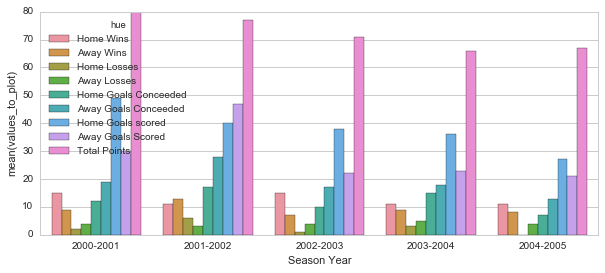

In [12]:
plt.subplots(figsize=(10,4))
sns.set_style('whitegrid')
sns.barplot(x='Season Year',y='values_to_plot',hue= 'hue',data=f_df)

In [18]:
all_years.to_csv()

',Season Year,Home Wins,Away Wins,Home Losses,Away Losses,Home Goals Conceeded,Away Goals Conceeded,Home Goals scored,Away Goals Scored,Total Points\n1,2000-2001,15.0,9.0,2.0,4.0,12.0,19.0,49.0,30.0,80.0\n2,2001-2002,11.0,13.0,6.0,3.0,17.0,28.0,40.0,47.0,77.0\n3,2002-2003,15.0,7.0,1.0,4.0,10.0,17.0,38.0,22.0,71.0\n4,2003-2004,11.0,9.0,3.0,5.0,15.0,18.0,36.0,23.0,66.0\n5,2004-2005,11.0,8.0,0.0,4.0,7.0,13.0,27.0,21.0,67.0\n'

In [16]:
all_years.to_csv()

,Season Year,Home Wins,Away Wins,Home Losses,Away Losses,Home Goals Conceeded,Away Goals Conceeded,Home Goals scored,Away Goals Scored,Total Points
1,2000-2001,15.0,9.0,2.0,4.0,12.0,19.0,49.0,30.0,80.0
2,2001-2002,11.0,13.0,6.0,3.0,17.0,28.0,40.0,47.0,77.0
3,2002-2003,15.0,7.0,1.0,4.0,10.0,17.0,38.0,22.0,71.0
4,2003-2004,11.0,9.0,3.0,5.0,15.0,18.0,36.0,23.0,66.0
5,2004-2005,11.0,8.0,0.0,4.0,7.0,13.0,27.0,21.0,67.0


In [17]:
for col in all_years.columns:
    all_years['z'] = col

Index(['Season Year', 'Home Wins', 'Away Wins', 'Home Losses', 'Away Losses',
       'Home Goals Conceeded', 'Away Goals Conceeded', 'Home Goals scored',
       'Away Goals Scored', 'Total Points'],
      dtype='object')

In [46]:
TP = all_years.transpose()
TP

,1,2,3,4,5
Season Year,2005-2006,2006-2007,2007-2008,2008-2009,2009-2010
Home Wins,13,15,17,16,16
Away Wins,12,13,10,12,11
Home Losses,1,2,1,1,2
Away Losses,4,3,4,3,5
Home Goals Conceeded,8,12,7,13,12
Away Goals Conceeded,26,15,15,11,16
Home Goals scored,37,46,47,43,52
Away Goals Scored,35,37,33,25,34
Total Points,83,89,87,90,85


In [50]:

li_details = []

df1 = all_years[['Home Wins']]
df2 = all_years[['Away Wins']]
df3 = all_years[['Home Losses']]
df4 = all_years[['Away Losses']]
df5 = all_years[['Home Goals scored']]

li_details.append(df1)
li_details.append(df2)
#li_details.append(df3)
#li_details.append(df4)
#li_details.append(df5)

all_stats = []

for col in all_years.columns:
    print(all_years[col])
    each_col = all_years[[col]].rename(columns={col:'Stats'})
    each_col['Statistics'] = col
    all_stats.append(each_col)
    
final_df = pd.concat(all_stats)    
final_df.reset_index()

1               2005-2006
2               2006-2007
3               2007-2008
4               2008-2009
5               2009-2010
Statistics    Season Year
Name: Season Year, dtype: object
1                    13
2                    15
3                    17
4                    16
5                    16
Statistics    Home Wins
Name: Home Wins, dtype: object
1                    12
2                    13
3                    10
4                    12
5                    11
Statistics    Away Wins
Name: Away Wins, dtype: object
1                       1
2                       2
3                       1
4                       1
5                       2
Statistics    Home Losses
Name: Home Losses, dtype: object
1                       4
2                       3
3                       4
4                       3
5                       5
Statistics    Away Losses
Name: Away Losses, dtype: object
1                                8
2                               12
3            

,index,Stats,Statistics
0,1,2005-2006,Season Year
1,2,2006-2007,Season Year
2,3,2007-2008,Season Year
3,4,2008-2009,Season Year
4,5,2009-2010,Season Year
5,1,13,Home Wins
6,2,15,Home Wins
7,3,17,Home Wins
8,4,16,Home Wins
9,5,16,Home Wins


ValueError: Could not interpret input 'index'

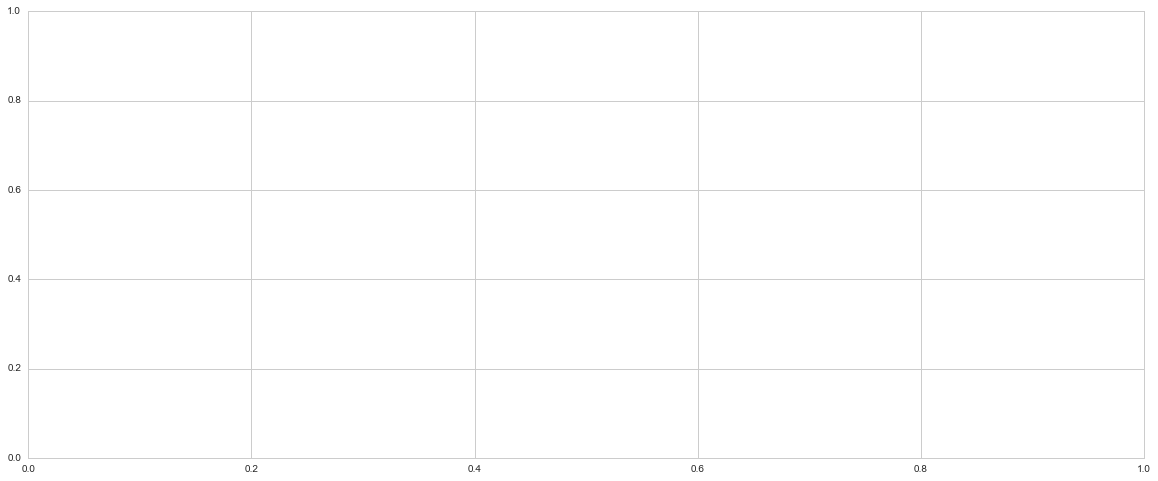

In [55]:
plt.subplots(figsize=(20,8))
sns.barplot(x='index',y='Stats',hue='Statistics',data=final_df)

In [33]:
final_df

1                        2005-2006
2                        2006-2007
3                        2007-2008
4                        2008-2009
5                        2009-2010
Statistics             Season Year
1                               13
2                               15
3                               17
4                               16
5                               16
Statistics               Home Wins
1                               12
2                               13
3                               10
4                               12
5                               11
Statistics               Away Wins
1                                1
2                                2
3                                1
4                                1
5                                2
Statistics             Home Losses
1                                4
2                                3
3                                4
4                                3
5                   

In [314]:
li = [45,45,323,2323]



#df = pd.DataFrame([1, 2, 3, 4], columns=['B'])
#df_li = pd.DataFrame([45,45,323,2323], columns=['B'])
#df = df.append([df_li],ignore_index=True)


columns = ['Season Year', 'Home Wins','Away Wins','Home Losses']
df = pd.DataFrame(np.nan, index=[0], columns=columns)
df_li = pd.DataFrame([li], columns=columns)
df = df.append([df_li], ignore_index=True)
#df.drop(df.index[0])
df

all_candidate = []
for can_name in 'Season Year', 'Home Wins','Away Wins','Home Losses':
    single_candidate = df[['Season Year',can_name]].rename(columns={can_name:'das'})
    single_candidate['name'] = can_name
    all_candidate.append(single_candidate)
#final_candidate_df = pd.concat(all_candidate)
#final_candidate_df

single_candidate

,Season Year,das,name
0,NaN,NaN,Home Losses
1,45.0,2323.0,Home Losses


In [229]:
a =1
for i in range(0,10):
        print(i)
        
ll = list(range(10))
print(ll)

0
1
2
3
4
5
6
7
8
9
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [132]:


all_df = []
df = pd.DataFrame(np.nan, index=[0,1,2,3], columns=['A'])
#print(df)

for file1_ in glob("C:\Data Analysis\Sujay_DataAnalysis\Final\Data\*.csv"):
    _EPL_ALL1_ = pd.read_csv(file1_)
    
    name1 = file1_.split('\\')[-1].split('.')[0].split('_')[1]
    print(name1)
    df['name'] = name1
    all_df.append(df)
    print(all_df)
    print("\n\n")
f_df = pd.concat(all_df,ignore_index=True)

2005-2006
[    A       name
0 NaN  2005-2006
1 NaN  2005-2006
2 NaN  2005-2006
3 NaN  2005-2006]



2006-2007
[    A       name
0 NaN  2006-2007
1 NaN  2006-2007
2 NaN  2006-2007
3 NaN  2006-2007,     A       name
0 NaN  2006-2007
1 NaN  2006-2007
2 NaN  2006-2007
3 NaN  2006-2007]



2007-2008
[    A       name
0 NaN  2007-2008
1 NaN  2007-2008
2 NaN  2007-2008
3 NaN  2007-2008,     A       name
0 NaN  2007-2008
1 NaN  2007-2008
2 NaN  2007-2008
3 NaN  2007-2008,     A       name
0 NaN  2007-2008
1 NaN  2007-2008
2 NaN  2007-2008
3 NaN  2007-2008]



2008-2009
[    A       name
0 NaN  2008-2009
1 NaN  2008-2009
2 NaN  2008-2009
3 NaN  2008-2009,     A       name
0 NaN  2008-2009
1 NaN  2008-2009
2 NaN  2008-2009
3 NaN  2008-2009,     A       name
0 NaN  2008-2009
1 NaN  2008-2009
2 NaN  2008-2009
3 NaN  2008-2009,     A       name
0 NaN  2008-2009
1 NaN  2008-2009
2 NaN  2008-2009
3 NaN  2008-2009]



2009-2010
[    A       name
0 NaN  2009-2010
1 NaN  2009-2010
2 NaN  2009-2010
3 NaN

In [95]:
Team_Name = "Man United"

#Analysis One Get only set of Data Needed
Analysis_1_Data = _EPL_ALL_[['Date','HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR']]

_All_Matches_ = Analysis_1_Data.loc[(Analysis_1_Data["HomeTeam"] == Team_Name) | (Analysis_1_Data["AwayTeam"] == Team_Name)]
#_All_Matches_

#Total_matches = _Team_Matches_.AwayTeam.count()

_Home_Matches_ = _All_Matches_.loc[(_All_Matches_["HomeTeam"] == Team_Name)]
_Away_Matches_ = _All_Matches_.loc[(_All_Matches_["AwayTeam"] == Team_Name)]

print(_Home_Matches_)
print("\n\n\n\n")
print(_Away_Matches_)


Home_Wins = _Home_Matches_.loc[(_Home_Matches_["FTR"] == "H")]
Home_Win_Count = Home_Wins.FTR.count()

Home_loss = _Home_Matches_.loc[(_Home_Matches_["FTR"] == "A")]
Home_loss_Count = Home_loss.FTR.count()

Home_draw = _Home_Matches_.loc[(_Home_Matches_["FTR"] == "D")]
Home_draw_Count = Home_draw.FTR.count()

print(Home_Win_Count)
print(Home_loss_Count)


Away_Wins = _Away_Matches_.loc[(_Away_Matches_["FTR"] == "A")]
Away_Wins_Count = Away_Wins.FTR.count()


Away_loss = _Away_Matches_.loc[(_Away_Matches_["FTR"] == "H")]
Away_loss_Count = Away_loss.FTR.count()

Away_draw = _Away_Matches_.loc[(_Away_Matches_["FTR"] == "D")]
Away_draw_Count = Away_draw.FTR.count()

print(Away_Wins_Count)
print(Away_loss_Count)

Home_Goals_scored = _Home_Matches_.FTHG.sum()
Home_Goals_conceeded = _Home_Matches_.FTAG.sum()
Home_Goals_conceeded


print(Home_draw_Count)
print(Away_draw_Count)

Total_Points = ((Home_Win_Count + Away_Wins_Count) * 3) + Home_draw_Count + Away_draw_Count
Total_Points

         Date    HomeTeam       AwayTeam  FTHG  FTAG FTR  HTHG  HTAG HTR
14   20/08/05  Man United    Aston Villa     1     0   H     0     0   D
39   10/09/05  Man United       Man City     1     1   D     1     0   H
60   24/09/05  Man United      Blackburn     1     2   A     0     1   A
90   22/10/05  Man United      Tottenham     1     1   D     1     0   H
114  06/11/05  Man United        Chelsea     1     0   H     1     0   H
140  03/12/05  Man United     Portsmouth     3     0   H     1     0   H
154  11/12/05  Man United        Everton     1     1   D     1     1   D
157  14/12/05  Man United          Wigan     4     0   H     2     0   H
171  26/12/05  Man United      West Brom     3     0   H     2     0   H
188  31/12/05  Man United         Bolton     4     1   H     2     1   H
222  22/01/06  Man United      Liverpool     1     0   H     0     0   D
237  04/02/06  Man United         Fulham     4     2   H     3     2   H
286  12/03/06  Man United      Newcastle     2     

83